In [13]:
#import libraries here
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np

%matplotlib inline

In [25]:
#read data to DataFrame
wine_main = pd.read_csv('winemag-data-130k-v2.csv')

#shape
print(wine_main.shape)

wine_main.head()


(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


region_2                 61.14
designation              28.83
taster_twitter_handle    24.02
taster_name              20.19
region_1                 16.35
price                     6.92
province                  0.05
country                   0.05
variety                   0.00
winery                    0.00
title                     0.00
points                    0.00
description               0.00
Unnamed: 0                0.00
dtype: float64

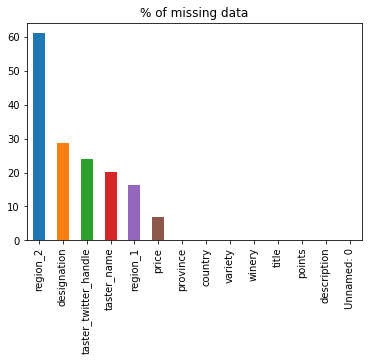

In [26]:
#identify missing data by column
missing_by_columns = wine_main.isnull().mean().sort_values(ascending=False).round(4)*100
missing_by_columns.plot(kind='bar')
plt.title("% of missing data")
missing_by_columns

Among the columns with the most missing values are region_2 (%61), designation (%29), taster_twitter_handle (%24) and taster_name (%20). I decided to drop this column. The missing values in region_1 can simply mean that there is no region which can give important information.

In [27]:
#drop region_2, designation, taster_twitter_handle, taster_name
wine_clmn_reduced = wine_main.drop(columns=["region_2", "designation", "taster_twitter_handle", "taster_name"])
wine_clmn_reduced.head()

,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [38]:
#missing by rows
#drop rows with missing price
wine_row_reduced = wine_clmn_reduced.dropna(subset=['price'], how='any')
print(wine_row_reduced.shape)
wine_row_reduced.head()

(120975, 10)


,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [31]:
#check missing values by column again
wine_row_reduced.isnull().sum().sort_values(ascending=False)

region_1       19575
province          59
country           59
variety            1
winery             0
title              0
price              0
points             0
description        0
Unnamed: 0         0
dtype: int64

In [50]:
#Since country is one of the most important attribute to predict price. We will drop 59 rows with missing country. 
wine_row_reduced = wine_row_reduced.dropna(subset=['country','variety'], how='any')
#check missing values by column again
print("Number of rows, columns:", (wine_row_reduced.shape[0], wine_row_reduced.shape[1]))
wine_row_reduced.isnull().sum().sort_values(ascending=False)


Number of rows, columns: (120915, 10)


region_1       19515
winery             0
variety            0
title              0
province           0
price              0
points             0
description        0
country            0
Unnamed: 0         0
dtype: int64

In [42]:
#identify categorical attributes
wine_row_reduced.dtypes

Unnamed: 0       int64
country         object
description     object
points           int64
price          float64
province        object
region_1        object
title           object
variety         object
winery          object
dtype: object

There are 8 object type attributes, we can one hot encode country, province, region_1, title, variety and winery

In [67]:
#Lets group by wines by title
wine_groupped = wine_row_reduced.groupby(['title'])['points','price'].mean()

In [76]:
wine_groupped['province'] = wine_groupped.apply(lambda x: wine_row_reduced[x])

KeyError: ('[ 82.  87.  89. ...,  88.  90.  90.] not in index', 'occurred at index points')

In [75]:
wine_groupped

,points,price,province
title,,,
1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),82.0,18.0,"(1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),..."
1+1=3 NV Brut Sparkling (Cava),87.0,16.0,"(1+1=3 NV Brut Sparkling (Cava), [Catalonia, C..."
1+1=3 NV Cygnus Brut Nature Reserva Made With Organic Grapes Sparkling (Cava),89.0,20.0,(1+1=3 NV Cygnus Brut Nature Reserva Made With...
1+1=3 NV Rosé Sparkling (Cava),86.0,20.0,"(1+1=3 NV Rosé Sparkling (Cava), [Catalonia])"
10 Knots 2006 Beachcomber White (Paso Robles),83.0,21.0,(10 Knots 2006 Beachcomber White (Paso Robles)...
10 Knots 2006 Chardonnay (Santa Barbara County),85.0,21.0,(10 Knots 2006 Chardonnay (Santa Barbara Count...
10 Knots 2009 Moonraker Grenache (Paso Robles),81.0,35.0,(10 Knots 2009 Moonraker Grenache (Paso Robles...
10 Knots 2010 Viognier (Paso Robles),84.0,22.0,"(10 Knots 2010 Viognier (Paso Robles), [Califo..."
100 Percent Wine 2012 All Profits to Charity Red (California),89.0,18.0,(100 Percent Wine 2012 All Profits to Charity ...
